In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Support Vector Machines
## Clasificación

Vamos a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

Creamos un modelo SVC usando [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), definimos el caso lineal con C=10

In [3]:
# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df_heart.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

Las clases están bastante balanceadas, voy a usar F1-Score como metrica de evaluación

In [6]:
# Hacemos variable dummy a las categoricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]

df_heart_dummies = pd.get_dummies(data=df_heart, 
                                  columns=categorical_features, 
                                  drop_first=True)

In [7]:
df_heart_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

---
Trabajemos en el modelo

Todas las variables son numericas, por lo que no debemos hacer nada para adaptarlas, mas que normalizarlas. Para este caso vamos a usar todos los atributos.

In [8]:
X = df_heart_dummies.drop(columns='target').values
y = df_heart.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Vamos a hacer una busqueda de grilla para buscar que modelo se ajustaria mejor.

In [13]:
from sklearn.svm import SVC

svm_hearth = SVC()

grid = GridSearchCV(svm_hearth,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='f1')

In [14]:
grid.best_params_

{'C': 100, 'degree': 5, 'kernel': 'poly'}

Elegido el mejor modelo y entrenado, podemos ver el estado

In [15]:
svm_hearth_best = grid.best_estimator_

Y podemos ver que el F1 score nos dio con el dataset de entrenamiento

In [16]:
from sklearn.metrics import f1_score

y_pred = svm_hearth_best.predict(X_test)

f1 = f1_score(y_test, y_pred)

print(f"F1-score de testeo fue: {f1}")

F1-score de testeo fue: 0.9794520547945206


Algo que podemos hacer con los SVM es obtener la curva ROC

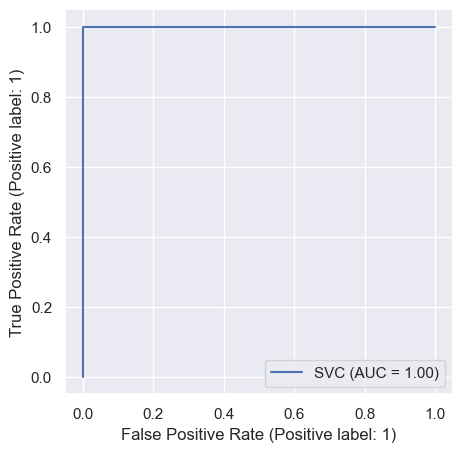

In [17]:
from sklearn.metrics import RocCurveDisplay
    
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(svm_hearth_best, X_test, y_test, ax=ax)

plt.show();

Como vemos el clasificador SVC para este dataset es prácticamente perfecto.